In [ ]:
# Importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
x = df.drop(columns=['Outcome'])
y = df['Outcome']

##SelectPercentile

In [ ]:
from sklearn.feature_selection import SelectPercentile, f_classif

In [ ]:
# Select top 50% features using ANOVA F-test
selector = SelectPercentile(score_func=f_classif, percentile=50)
x_selected = selector.fit_transform(x, y)

# Get selected column names
selected_features = x.columns[selector.get_support()]

print("Selected Feature Names:")
print(selected_features.tolist())

Selected Feature Names:
['Pregnancies', 'Glucose', 'BMI', 'Age']


In [ ]:
fscored_df = pd.DataFrame({'Column Names': x.columns,
                           'F-score': selector.scores_})
fscored_df

,Column Names,F-score
0,Pregnancies,39.670227
1,Glucose,213.161752
2,BloodPressure,3.256950
3,SkinThickness,4.304381
4,Insulin,13.281108
5,BMI,71.772072
6,DiabetesPedigreeFunction,23.871300
7,Age,46.140611


In [ ]:
fscored_df.sort_values(by=['F-score'],ascending=False)

,Column Names,F-score
1,Glucose,213.161752
5,BMI,71.772072
7,Age,46.140611
0,Pregnancies,39.670227
6,DiabetesPedigreeFunction,23.871300
4,Insulin,13.281108
3,SkinThickness,4.304381
2,BloodPressure,3.256950


## Confusion Matrix
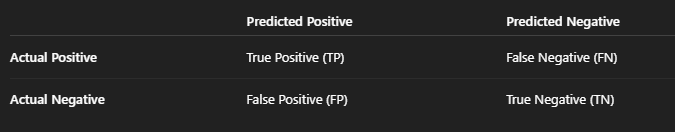

## SelectFpr (False Positive Rate Control)

False Positive Rate (FPR)


FPR = FP / (FP + TN)


It is the proportion of actual negatives that were incorrectly identified as positives.

In [ ]:
from sklearn.feature_selection import SelectFpr, f_classif

In [ ]:
# Apply FPR control with alpha = 0.05
selector = SelectFpr(score_func=f_classif, alpha=0.05)
x_selected = selector.fit_transform(x, y)

# Get selected column names
selected_columns = x.columns[selector.get_support()]

# Output
print("Selected Features (FPR < 0.05):")
print(selected_columns.tolist())

Selected Features (FPR < 0.05):
['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [ ]:
pscored_df = pd.DataFrame({'Column Names': x.columns,
                           'p-value': selector.pvalues_})
pscored_df

,Column Names,p-value
0,Pregnancies,5.065127e-10
1,Glucose,8.935432e-43
2,BloodPressure,7.151390e-02
3,SkinThickness,3.834770e-02
4,Insulin,2.861865e-04
5,BMI,1.229807e-16
6,DiabetesPedigreeFunction,1.254607e-06
7,Age,2.209975e-11


In [ ]:
pscored_df[pscored_df['p-value']<0.05]

,Column Names,p-value
0,Pregnancies,5.065127e-10
1,Glucose,8.935432e-43
3,SkinThickness,3.834770e-02
4,Insulin,2.861865e-04
5,BMI,1.229807e-16
6,DiabetesPedigreeFunction,1.254607e-06
7,Age,2.209975e-11


## SelectFdr (False Discovery rate control)

False Discovery Rate (FDR)


FDR = FP / (FP + TP)


It is the proportion of predicted positives that are actually false positives


*Benjamini–Hochberg (BH) procedure is used*

In [ ]:
from sklearn.feature_selection import SelectFdr, f_classif

In [ ]:
# Apply FPR control with alpha = 0.05
selector = SelectFdr(score_func=f_classif, alpha=0.05)
x_selected = selector.fit_transform(x, y)

# Get selected column names
selected_columns = x.columns[selector.get_support()]

# Output
print("Selected Features:")
print(selected_columns.tolist())

Selected Features:
['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [ ]:
pscored_df = pd.DataFrame({'Column Names': x.columns,
                           'p-value': selector.pvalues_})
pscored_df

,Column Names,p-value
0,Pregnancies,5.065127e-10
1,Glucose,8.935432e-43
2,BloodPressure,7.151390e-02
3,SkinThickness,3.834770e-02
4,Insulin,2.861865e-04
5,BMI,1.229807e-16
6,DiabetesPedigreeFunction,1.254607e-06
7,Age,2.209975e-11


Use FPR if you're focused on how well you avoid selecting irrelevant features.

Use FDR if you're focused on how trustworthy your selected features are.



## SelectFWe (Family-Wise Error Rate control)

FWER is the probability of making at least one false positive (Type I error) across all tests (i.e., the entire "family" of comparisons).

*Bonferroni Correction used*

In [ ]:
from sklearn.feature_selection import SelectFwe, f_classif

In [ ]:
# Apply FPR control with alpha = 0.05
selector = SelectFwe(score_func=f_classif, alpha=0.05)
x_selected = selector.fit_transform(x, y)

# Get selected column names
selected_columns = x.columns[selector.get_support()]

# Output
print("Selected Features:")
print(selected_columns.tolist())

Selected Features:
['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [ ]:
pscored_df = pd.DataFrame({'Column Names': x.columns,
                           'p-value': selector.pvalues_})
pscored_df

,Column Names,p-value
0,Pregnancies,5.065127e-10
1,Glucose,8.935432e-43
2,BloodPressure,7.151390e-02
3,SkinThickness,3.834770e-02
4,Insulin,2.861865e-04
5,BMI,1.229807e-16
6,DiabetesPedigreeFunction,1.254607e-06
7,Age,2.209975e-11
